In [1]:
## packages to handle array and datafram
import numpy as np
import pandas as pd

## Sklearn packages
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
## Reading the dat files
year_train, indicator_train = np.loadtxt("train.dat", usecols=(0,1), unpack=True)
year_test, indicator_test = np.loadtxt("test.dat", usecols=(0,1), unpack=True)

In [3]:
indicator_train

array([65.88791334, 67.21901249, 64.3206674 , 66.92166376, 66.11401206,
       66.59359495, 67.29843266, 65.96910343, 65.4752471 , 66.2797506 ,
       65.62325127, 65.58762306, 66.23720265, 65.26999151, 64.84324978,
       63.34073035, 66.40316557, 66.04316515, 63.87068233, 66.73921392,
       67.11898948, 65.37437138, 66.22703075, 65.36499928, 65.71061236,
       65.35474362, 66.00611589, 66.368468  , 66.78334217, 65.08089532,
       66.20761473, 62.29623387, 67.26293826, 61.93885757, 64.92412865,
       66.31769921, 66.45910062, 66.34765   , 65.65052   , 65.53492   ,
       66.11388   , 65.08628   ])

In [4]:
## preprocessing
x = year_train.reshape(-1,1)
y = indicator_train.reshape(-1,1)
X = year_test.reshape(-1,1)
Y = indicator_test.reshape(-1,1)

In [5]:
## polynomial and l2 penalizing parameters
lambda_val_ = [0,math.exp(-25),math.exp(-20),
             math.exp(-14),math.exp(-7),
             math.exp(-3),1,math.exp(7),
             math.exp(3)]
degree = np.arange(0,13)


In [6]:
scaler = preprocessing.StandardScaler().fit(x)
x_scaled = scaler.transform(x)
scaler = preprocessing.StandardScaler().fit(X)
X_scaled= scaler.transform(X)

In [58]:
def crossvals_poly(alpha,d):
    ## crossvalidation
    k = 6
    cv_method = KFold(n_splits=k, shuffle=False, random_state=None)
    scores = []
    for i, (train_idx, test_idx) in enumerate(cv_method.split(x_scaled, y)):
        #splitting train and test
        X_train, y_train = x_scaled[train_idx], y[train_idx]
        X_test, y_test = x_scaled[test_idx], y[test_idx]
        poly = PolynomialFeatures(degree=d)
        X_train_scaling_trans = poly.fit_transform(X_train)
        X_test_scaling_trans = poly.fit_transform(X_test)

        # Ridge Regression
        identity_matrix = np.identity(d+1)
        w = (np.linalg.inv(X_train_scaling_trans.T @ X_train_scaling_trans + alpha * identity_matrix) @ X_train_scaling_trans.T @ y_train)
        y_hat = X_test_scaling_trans @ w

        #y_denormalize = (y_hat * Std_train) + Mean_train

        score = math.sqrt((np.square(y_hat-y_test).mean()))

        scores.append(score)
    
    return np.array(scores).mean()

In [59]:
degree_array = []
for d in degree:
    degree_array.append([d,crossvals_poly(0,d)])

In [60]:
degree_array

[[0, 1.0155605589711298],
 [1, 1.0835561617376976],
 [2, 0.775429312351411],
 [3, 0.7830016853814868],
 [4, 0.49348184425648295],
 [5, 0.570135013390089],
 [6, 0.14235262539112223],
 [7, 0.18750847543590246],
 [8, 0.1463100743474711],
 [9, 0.23647291091694547],
 [10, 0.16488079790444554],
 [11, 0.6257835680055416],
 [12, 0.6869783284228649]]

Text(0, 0.5, 'Avg RMSE')

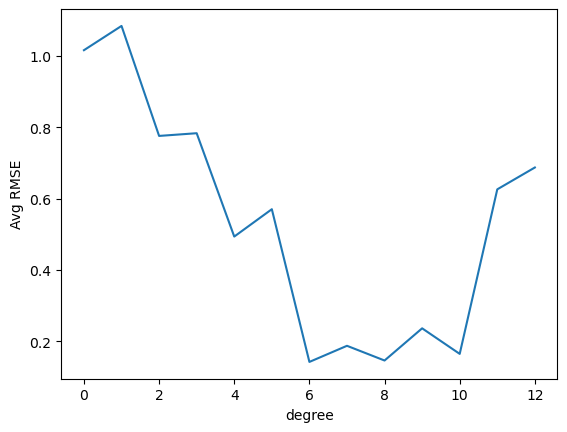

In [83]:
degree_df = pd.DataFrame(degree_array)
degree_df.columns = ["d","avg RMSE"]
plt.plot(degree_df.d , degree_df["avg RMSE"])
plt.xlabel("degree")
plt.ylabel("Avg RMSE")

In [11]:
lambda_array = []
for alpha in lambda_val_:
    lambda_array.append([alpha,crossvals_poly(alpha,12)])

In [12]:
lambda_array

[[0, 0.6869783284228649],
 [1.3887943864964021e-11, 0.6869783504368602],
 [2.061153622438558e-09, 0.6869791079793521],
 [8.315287191035679e-07, 0.6872836187408963],
 [0.0009118819655545162, 0.43203017645691477],
 [0.049787068367863944, 0.46918766654707705],
 [1, 3.8451040338290743],
 [1096.6331584284585, 62.20120346074582],
 [20.085536923187668, 30.19033244495183]]

Text(0.5, 0, 'Lambda values')

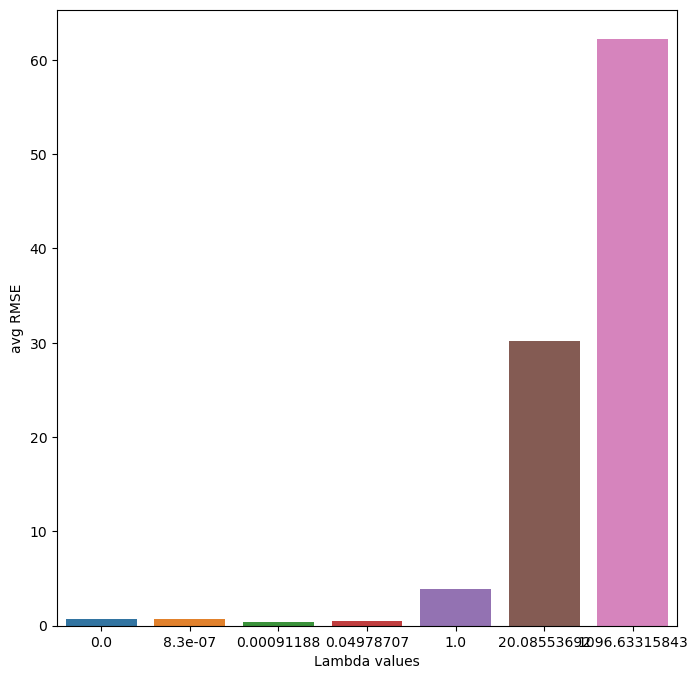

In [84]:
lambda_df = pd.DataFrame(lambda_array)
lambda_df.columns = ["l","avg RMSE"]
lambda_df.sort_values(["l"],inplace = True)
lambda_df.l = round(lambda_df.l,8)
plt.figure(figsize=(8,8))
plt.rcParams.update({'font.size': 10})
sns.barplot(data=lambda_df.head(9), x="l", y="avg RMSE")
plt.xlabel("Lambda values")

In [102]:
poly = PolynomialFeatures(degree=6)
X__trans = poly.fit_transform(x_scaled)
X_test_trans = poly.fit_transform(X_scaled)
identity_matrix = np.identity(6+1)
w = (np.linalg.inv(X__trans.T @ X__trans + math.exp(-7) * identity_matrix) @ X__trans.T @ y)
y_hat = X_test_trans @ w

In [103]:
np.array(w).round(3)

array([[ 6.5568e+01],
       [ 4.1700e-01],
       [ 3.9440e+00],
       [ 1.5800e-01],
       [-3.4450e+00],
       [ 1.0000e-02],
       [ 6.2800e-01]])

In [104]:
math.sqrt((np.square(y_hat-Y).mean()))

0.540773295401877

In [105]:
w = (np.linalg.inv(X__trans.T @ X__trans + math.exp(-7) * identity_matrix) @ X__trans.T @ y)
y_hat = X__trans @ w

In [106]:
y

array([[65.88791334],
       [67.21901249],
       [64.3206674 ],
       [66.92166376],
       [66.11401206],
       [66.59359495],
       [67.29843266],
       [65.96910343],
       [65.4752471 ],
       [66.2797506 ],
       [65.62325127],
       [65.58762306],
       [66.23720265],
       [65.26999151],
       [64.84324978],
       [63.34073035],
       [66.40316557],
       [66.04316515],
       [63.87068233],
       [66.73921392],
       [67.11898948],
       [65.37437138],
       [66.22703075],
       [65.36499928],
       [65.71061236],
       [65.35474362],
       [66.00611589],
       [66.368468  ],
       [66.78334217],
       [65.08089532],
       [66.20761473],
       [62.29623387],
       [67.26293826],
       [61.93885757],
       [64.92412865],
       [66.31769921],
       [66.45910062],
       [66.34765   ],
       [65.65052   ],
       [65.53492   ],
       [66.11388   ],
       [65.08628   ]])

In [107]:
math.sqrt((np.square(y_hat-y).mean()))

0.10542694840456171

C:\Users\SS Studios\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SS Studios\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'indicator')

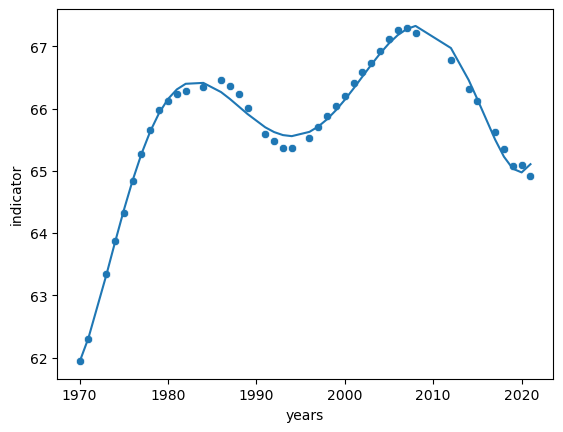

In [109]:
sns.scatterplot( x.flatten(),y.flatten())
sns.lineplot( x.flatten(),y_hat.flatten())
plt.xlabel("years")
plt.ylabel("indicator")